In [16]:
import numpy as np
import pandas as pd
import ast
from sentence_transformers import util
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [2]:
jokes = pd.read_csv('combined_dataframe_only_with_questionmarks_only_good_explanations_manuallyfiltered_EMBEDDINGS_minilm_openai_COMPLETE_with_score.csv')


In [3]:
jokes

,setup,punchline,central_expression,explanation,sentence1,sentence2,emb_minilm_setup,emb_minilm_punchline,emb_minilm_central_expression,emb_minilm_explanation,emb_minilm_sentence1,emb_minilm_sentence2,emb_openai_setup,emb_openai_punchline,emb_openai_central_expression,emb_openai_explanation,emb_openai_sentence1,emb_openai_sentence2,score
0,Why did the radiologist break up with the gold...,because he saw right through her.,saw,Saw can mean to visualize with the eyes or to...,I saw a beautiful sunset at the beach.,I used a saw to cut the wood for the project.,"[0.007488126866519451, 0.030674085021018982, -...","[0.06745095551013947, 0.01017136499285698, 0.0...","[-0.12122045457363129, -0.02459784410893917, -...","[-0.055776748806238174, -0.05288219079375267, ...","[0.05075623095035553, 0.055086541920900345, 0....","[-0.00222043227404356, 0.05221560597419739, 0....","[-0.025358721613883972, -0.012494157068431377,...","[-0.002336961217224598, -0.01616068184375763, ...","[-0.000600526574999094, -0.023334747180342674,...","[0.03319184482097626, 0.024518469348549843, -0...","[-0.002336961217224598, -0.01616068184375763, ...","[-0.0023913229815661907, 0.008885013870894909,...",3.0
1,Why was 6 afraid of 7?,because 7 was arrested for manslaughter.,seven,Seven can refer to the number or can suggest ...,I have seven apples in the basket.,The seven wonders of the world are a marvel t...,"[0.02685719169676304, 0.029428044334053993, 0....","[-0.010619604960083961, 0.03787219896912575, 0...","[-0.020596999675035477, 0.03459898382425308, -...","[0.022140510380268097, 0.004772734362632036, 0...","[0.06108887866139412, 0.02654448337852955, 0.0...","[0.010117757134139538, 0.003312867833301425, 0...","[-0.032564472407102585, -0.02926553785800934, ...","[-0.01601955108344555, 0.03183838725090027, -0...","[-0.02164021134376526, -0.019520355388522148, ...","[-0.003673259634524584, -0.015242430381476879,...","[-0.01601955108344555, 0.03183838725090027, -0...","[-0.03528172895312309, -0.0237813089042902, -0...",52.0
2,Why did the melon plan a big elaborate wedding?,because he cantaloupe.,cantaloupe,A type of melon,I bought a cantaloupe from the grocery store ...,The cantaloupe was so large that it could not...,"[-0.02460584230720997, 0.09776933491230011, 0....","[0.0727701485157013, 0.00920684915035963, 0.01...","[-0.030697468668222427, 0.0374496765434742, -0...","[-0.03980013728141785, 0.004972108174115419, 0...","[-0.019579900428652763, 0.02343406341969967, -...","[-0.037739649415016174, 0.05919461324810982, -...","[0.02010415680706501, 0.04667285084724426, -0....","[0.022400790825486183, -0.006642993073910475, ...","[0.032135266810655594, -0.01836719550192356, -...","[-0.038097042590379715, 0.034105442464351654, ...","[0.022400790825486183, -0.006642993073910475, ...","[0.032091304659843445, -0.011365670710802078, ...",0.0
3,How can you tell if someone got their dog from...,dont worry theyll let you know.,let,The term let means to allow or permit.,Please let me know if you have any questions ...,I hope they will let us know if the event is ...,"[-0.00539117306470871, 0.05857688933610916, 0....","[0.0022354505490511656, -0.04810196906328201, ...","[-0.06675653904676437, 0.04044463112950325, -0...","[0.04194096103310585, 0.04042356088757515, 0.0...","[-0.09673307836055756, 0.06690064072608948, 0....","[-0.020680885761976242, -0.018466545268893242,...","[-0.0033821361139416695, -0.043349530547857285...","[0.034634996205568314, -0.004950615577399731, ...","[-0.01101684384047985, -0.01995272748172283, -...","[0.043104387819767, -0.0009010729263536632, -0...","[0.034634996205568314, -0.004950615577399731, ...","[-0.004991018213331699, 0.012647897936403751, ...",0.0
4,What is a mummies favorite genre of music?,wrap,wrap,The word wrap refers to a type of music genre...,The chef prepared a delicious wrap filled wit...,The film was a wrap for the director after an...,"[0.019643135368824005, -0.07043468952178955, -...","[-0.07856648415327072, 0.096978664398193

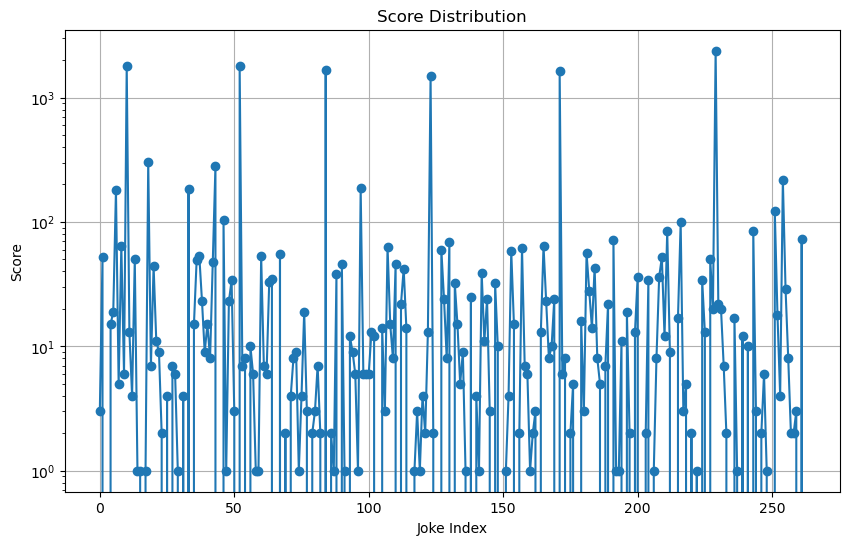

In [4]:
import matplotlib.pyplot as plt

# Plot the score values
plt.figure(figsize=(10, 6))
plt.plot(jokes['score'], marker='o', linestyle='-')
plt.title('Score Distribution')
plt.xlabel('Joke Index')
plt.ylabel('Score')
#plt.ylim(0, 100)  # Set Y-axis range from 0 to 10
plt.yscale('log')
plt.grid(True)
plt.show()


In [5]:
jokes_sorted = jokes.sort_values(by='score', ascending=False)


In [6]:
jokes_sorted.reset_index(drop=True)[:10]

,setup,punchline,central_expression,explanation,sentence1,sentence2,emb_minilm_setup,emb_minilm_punchline,emb_minilm_central_expression,emb_minilm_explanation,emb_minilm_sentence1,emb_minilm_sentence2,emb_openai_setup,emb_openai_punchline,emb_openai_central_expression,emb_openai_explanation,emb_openai_sentence1,emb_openai_sentence2,score
0,How did the farmer find the sheep in the tall ...,very satisfying.,satisfying,Satisfying can mean fulfilling or giving plea...,The fulfilling conclusion of the project made...,"The meal was unexpectedly satisfying, leaving...","[-0.027218764647841454, 0.09441161900758743, -...","[-0.005315548740327358, -0.04644639790058136, ...","[-0.017775975167751312, -0.01675179786980152, ...","[0.012255684472620487, -0.04540111869573593, 0...","[-0.0056816814467310905, 0.1541108936071396, 0...","[0.004295822232961655, 0.0205642431974411, 0.0...","[0.0021374362986534834, -0.023539390414953232,...","[-0.004096473567187786, 0.007671840488910675, ...","[0.005240895319730043, -0.02275709994137287, -...","[0.025062037631869316, 0.0045335800386965275, ...","[-0.004096473567187786, 0.007671840488910675, ...","[-0.023214809596538544, -0.026223449036478996,...",2379.0
1,What do you call a cheap circumcision?,a rip off,rip,A rip can mean a tear or opening in something,The rip in the fabric made it unusable,The gymnast performed a flawless rip in the a...,"[0.02473675087094307, 0.10653737187385559, -0....","[-0.11716895550489426, 0.05911571532487869, -0...","[-0.07695385813713074, 0.03100956603884697, 0....","[-0.05940747261047363, -0.006655050441622734, ...","[-0.03825189173221588, 0.10527506470680237, 0....","[-0.050449587404727936, 0.04284587875008583, 0...","[-0.004615247715264559, 0.02477269247174263, -...","[-0.0330120213329792, -0.008153055794537067, -...","[0.02349996566772461, 0.00402356730774045, -0....","[0.03021017089486122, 0.050446927547454834, -0...","[-0.0330120213329792, -0.008153055794537067, -...","[0.018487626686692238, 0.02348954975605011, -0...",1795.0
2,What do you call a cheap circumcision?,A rip-off.,rip,To tear or damage something,I need to rip this paper before I can use it.,The rip in the fabric exposed the old stitching.,"[0.02473675087094307, 0.10653737187385559, -0....","[-0.1312861442565918, 0.05137072503566742, -0....","[-0.07695385813713074, 0.03100956603884697, 0....","[-0.030435174703598022, 0.11190993338823318, 0...","[-0.13667938113212585, 0.07368399947881699, -0...","[-0.04913385957479477, 0.07562312483787537, 0....","[-0.004615247715264559, 0.02477269247174263, -...","[-0.03589850664138794, 0.01058061234652996, -0...","[0.02349996566772461, 0.00402356730774045, -0....","[0.017682168632745743, 0.026705166324973106, -...","[-0.035905733704566956, 0.01059001125395298, -...","[0.014585091732442379, 0.05143440514802933, -0...",1795.0
3,What do you call it when batman skips church?,christian bale!,bale,A bale is a bundle of raw or finished materia...,The farmer loaded the bale of hay onto the tr...,The actor made a significant contribution to ...,"[0.04520629346370697, 0.07526339590549469, -0....","[-0.04217968136072159, 0.0009335151989944279, ...","[-0.07476113736629486, 0.0344233363866806, -0....","[-0.07676440477371216, -0.00975087657570839, 0...","[-0.00917363353073597, 0.026088474318385124, 0...","[0.00797322764992714, 0.008390052244067192, -0...","[0.009722449816763401, 0.01504017598927021, 0....","[-0.0008512400672771037, 0.02573290653526783, ...","[0.025989385321736336, 0.014036300592124462, 0...","[0.04975290223956108, 0.01702006720006466, 0.0...","[-0.0008512400672771037, 0.02573290653526783, ...","[0.007037866394966841, -0.009163657203316689, ...",1680.0
4,What is the hardest part about being a pedophile?,fitting in,fitting,Fitting can refer to being suitable or approp...,The tailor ensured that the new suit was fitt...,The puzzle pieces are fitting together nicely...,"[-0.004965764004737139, 0.038033392280340195, ...","[-0.03360368683934212, 0.03755970671772957, -0...","

In [7]:
for i in range(10):
    row = jokes_sorted.iloc[i]
    print(row['setup'], row['punchline'], "-", row['score'])

How did the farmer find the sheep in the tall grass?  very satisfying. - 2379.0
What do you call a cheap circumcision?  a rip off - 1795.0
What do you call a cheap circumcision?  A rip-off. - 1795.0
What do you call it when batman skips church?  christian bale! - 1680.0
What is the hardest part about being a pedophile?  fitting in - 1632.0
Why is leather armor best for sneaking?  its literally made of hide. - 1486.0
What do you call a guy who hangs out with musicians?  kanye - 303.0
What do you call ten rabbits walking backwards?  a receding hare line! - 282.0
What did the debater say after getting stabbed during an argument?  good point - 219.0
What do you call a factory that only makes good products?  a satisfactory - 187.0


### Create classes:

up to 10: 1
from 11 to 100: 2
from 101 to 1000: 3
over 1001: 4

In [8]:
# Define the mapping function
def classify_score(score):
    if score == 0:
        return 0
    elif score <= 10:
        return 1
    elif score <= 100:
        return 2
    elif score <= 1000:
        return 3
    else:
        return 4




In [9]:
# Apply the function to create a new column
jokes['score_class'] = jokes['score'].apply(classify_score)



In [10]:
jokes

,setup,punchline,central_expression,explanation,sentence1,sentence2,emb_minilm_setup,emb_minilm_punchline,emb_minilm_central_expression,emb_minilm_explanation,emb_minilm_sentence1,emb_minilm_sentence2,emb_openai_setup,emb_openai_punchline,emb_openai_central_expression,emb_openai_explanation,emb_openai_sentence1,emb_openai_sentence2,score,score_class
0,Why did the radiologist break up with the gold...,because he saw right through her.,saw,Saw can mean to visualize with the eyes or to...,I saw a beautiful sunset at the beach.,I used a saw to cut the wood for the project.,"[0.007488126866519451, 0.030674085021018982, -...","[0.06745095551013947, 0.01017136499285698, 0.0...","[-0.12122045457363129, -0.02459784410893917, -...","[-0.055776748806238174, -0.05288219079375267, ...","[0.05075623095035553, 0.055086541920900345, 0....","[-0.00222043227404356, 0.05221560597419739, 0....","[-0.025358721613883972, -0.012494157068431377,...","[-0.002336961217224598, -0.01616068184375763, ...","[-0.000600526574999094, -0.023334747180342674,...","[0.03319184482097626, 0.024518469348549843, -0...","[-0.002336961217224598, -0.01616068184375763, ...","[-0.0023913229815661907, 0.008885013870894909,...",3.0,1
1,Why was 6 afraid of 7?,because 7 was arrested for manslaughter.,seven,Seven can refer to the number or can suggest ...,I have seven apples in the basket.,The seven wonders of the world are a marvel t...,"[0.02685719169676304, 0.029428044334053993, 0....","[-0.010619604960083961, 0.03787219896912575, 0...","[-0.020596999675035477, 0.03459898382425308, -...","[0.022140510380268097, 0.004772734362632036, 0...","[0.06108887866139412, 0.02654448337852955, 0.0...","[0.010117757134139538, 0.003312867833301425, 0...","[-0.032564472407102585, -0.02926553785800934, ...","[-0.01601955108344555, 0.03183838725090027, -0...","[-0.02164021134376526, -0.019520355388522148, ...","[-0.003673259634524584, -0.015242430381476879,...","[-0.01601955108344555, 0.03183838725090027, -0...","[-0.03528172895312309, -0.0237813089042902, -0...",52.0,2
2,Why did the melon plan a big elaborate wedding?,because he cantaloupe.,cantaloupe,A type of melon,I bought a cantaloupe from the grocery store ...,The cantaloupe was so large that it could not...,"[-0.02460584230720997, 0.09776933491230011, 0....","[0.0727701485157013, 0.00920684915035963, 0.01...","[-0.030697468668222427, 0.0374496765434742, -0...","[-0.03980013728141785, 0.004972108174115419, 0...","[-0.019579900428652763, 0.02343406341969967, -...","[-0.037739649415016174, 0.05919461324810982, -...","[0.02010415680706501, 0.04667285084724426, -0....","[0.022400790825486183, -0.006642993073910475, ...","[0.032135266810655594, -0.01836719550192356, -...","[-0.038097042590379715, 0.034105442464351654, ...","[0.022400790825486183, -0.006642993073910475, ...","[0.032091304659843445, -0.011365670710802078, ...",0.0,0
3,How can you tell if someone got their dog from...,dont worry theyll let you know.,let,The term let means to allow or permit.,Please let me know if you have any questions ...,I hope they will let us know if the event is ...,"[-0.00539117306470871, 0.05857688933610916, 0....","[0.0022354505490511656, -0.04810196906328201, ...","[-0.06675653904676437, 0.04044463112950325, -0...","[0.04194096103310585, 0.04042356088757515, 0.0...","[-0.09673307836055756, 0.06690064072608948, 0....","[-0.020680885761976242, -0.018466545268893242,...","[-0.0033821361139416695, -0.043349530547857285...","[0.034634996205568314, -0.004950615577399731, ...","[-0.01101684384047985, -0.01995272748172283, -...","[0.043104387819767, -0.0009010729263536632, -0...","[0.034634996205568314, -0.004950615577399731, ...","[-0.004991018213331699, 0.012647897936403751, ...",0.0,0
4,What is a mummies favorite genre of music?,wrap,wrap,The word wrap refers to a type of music genre...,The chef prepared a delicious wrap filled wit...,The film was a wrap for the director after an...,"[0.019643135368824005, -0.07043468952178955, -...","[-0.0785664841532707

In [11]:
# Check the distribution of classes in y_train
class_counts = jokes['score_class'].value_counts()
print(class_counts)

score_class
1    105
2     81
0     63
3      8
4      6
Name: count, dtype: int64


In [12]:
len(jokes[jokes['score'] == 3])

12

# Calculate metrics

    • Obviousness: the cosine similarity of the embedding vectors of setup (“What did the debater say after getting stabbed during an argument?”) and the sentence 1 ("The knife had a sharp point that could easily cut through paper.").
    For the pun to work, this should be high.
    
    • Compatibility: the cosine similarity of the embedding vectors of punchline ("good point") and sentence 2 ("During the debate, he made a valid point that swayed the audience.").
    For the pun to work, this should be high.
    
    • Symmetry: the difference between obviousness and compatibility (do the two meanings work equally well?). 
    For the pun to work, this should be low.
    
    • Comparison: the cosine similarity between the text of the setup and the punchline.
    For the pun to work, this should be low.

# MINILM

In [18]:
# Obviousness

jokes['minilm_obviousness'] = None
jokes['minilm_obviousness'] = jokes.apply(
    lambda row: abs(
        util.cos_sim(ast.literal_eval(row['emb_minilm_setup']), ast.literal_eval(row['emb_minilm_sentence1'])).item()
    ),
    axis=1
)

# Compatibility

jokes['minilm_compatibility'] = None
jokes['minilm_compatibility'] = jokes.apply(
    lambda row: abs(
        util.cos_sim(ast.literal_eval(row['emb_minilm_punchline']), ast.literal_eval(row['emb_minilm_sentence2'])).item()
    ),
    axis=1
)

# Symmetry

jokes['minilm_symmetry'] = None
jokes['minilm_symmetry'] = jokes['minilm_obviousness'] - jokes['minilm_compatibility']

# Comparison

jokes['minilm_comparison'] = None
jokes['minilm_comparison'] = jokes.apply(
    lambda row: abs(
        util.cos_sim(ast.literal_eval(row['emb_minilm_setup']), ast.literal_eval(row['emb_minilm_punchline'])).item()
    ),
    axis=1
)

# OPENAI

In [17]:
# Obviousness

jokes['openai_obviousness'] = None
jokes['openai_obviousness'] = jokes.apply(
    lambda row: abs(
        util.cos_sim(ast.literal_eval(row['emb_openai_setup']), ast.literal_eval(row['emb_openai_sentence1'])).item()
    ),
    axis=1
)

# Compatibility

jokes['openai_compatibility'] = None
jokes['openai_compatibility'] = jokes.apply(
    lambda row: abs(
        util.cos_sim(ast.literal_eval(row['emb_openai_punchline']), ast.literal_eval(row['emb_openai_sentence2'])).item()
    ),
    axis=1
)

# Symmetry

jokes['openai_symmetry'] = None
jokes['openai_symmetry'] = jokes['openai_obviousness'] - jokes['openai_compatibility']

# Comparison

jokes['openai_comparison'] = None
jokes['openai_comparison'] = jokes.apply(
    lambda row: abs(
        util.cos_sim(ast.literal_eval(row['emb_openai_setup']), ast.literal_eval(row['emb_openai_punchline'])).item()
    ),
    axis=1
)

In [19]:
jokes.to_csv("combined_dataframe_only_with_questionmarks_only_good_explanations_manuallyfiltered_EMBEDDINGS_minilm_openai_COMPLETE_with_score_and_metrics.csv", encoding='utf-8', index=False)
